In [1]:
cd("../Source")
include("ChiralMC.jl")
using ChiralMC

include("functions_msc.jl")
include("functions_observables.jl")
include("functions_parallel.jl")

using Base.Test
using Plots
gr()
using Distributions

# Testing State constructor.
N = 20
β = 1/300
ψ = State(2,N)

println("Testing State constructor\n----------------------------------------------------------------")
println("Testing if lattice dimensions are correct")
println(@test size(ψ.lattice,1) == size(ψ.lattice,2) && size(ψ.lattice,2) == N && N == ψ.consts.L)
println("Checking that State(2,N) gives a valid State")
println(checkState(ψ))
ψ = State(1,N)
println("Checking that State(1,N) gives a valid state")
println(checkState(ψ))
gm = 1.0; g = 1.1; ν = 0.5; f = 1/N
c = SystConstants(N, gm, 1/g^2, ν, f, β)
ψ = State(2, c)
println("Checking that State(2, ::SystConstants) gives valid state")
println(checkState(ψ))
println("Checking that constants are set correctly")
println(@test ψ.consts.γ == c.γ && ψ.consts.g⁻² == c.g⁻² && ψ.consts.ν == c.ν && ψ.consts.f == c.f && ψ.consts.β == c.β)
ψ = State(1, c)
println("Checking that State(1, ::SystConstants) gives valid state")
println(checkState(ψ))




Testing State constructor
----------------------------------------------------------------
Testing if lattice dimensions are correct
Test Passed
Checking that State(2,N) gives a valid State
Test Passed
Checking that State(1,N) gives a valid state
Test Passed
Checking that State(2, ::SystConstants) gives valid state
Test Passed
Checking that constants are set correctly
Test Passed
Checking that State(1, ::SystConstants) gives valid state
Test Passed


In [2]:
A = Array{Neighbors}(3,3)
ϕ = LatticeSite()
A[2,3] = Neighbors(ϕ,ϕ,ϕ,ϕ)
isassigned(A,2,3)

true

In [9]:
?isassigned

search: isassigned is_assigned_char



```
isassigned(array, i) -> Bool
```

Tests whether the given array has a value associated with index `i`. Returns `false` if the index is out of bounds, or has an undefined reference.

```jldoctest
julia> isassigned(rand(3, 3), 5)
true

julia> isassigned(rand(3, 3), 3 * 3 + 1)
false

julia> mutable struct Foo end

julia> v = similar(rand(3), Foo)
3-element Array{Foo,1}:
 #undef
 #undef
 #undef

julia> isassigned(v, 1)
false
```


In [2]:
########################################################################################
#                     Testing neighbor functions
#
########################################################################################

# Checking that all neighbor references have been set to something.
L = 5
ψ = State(2,L)
for h_pos = 1:L, v_pos = 1:L
    @test isassigned(ψ.nb, v_pos,h_pos)
    @test isassigned(ψ.nnb, v_pos,h_pos)
    @test isassigned(ψ.nnnb, v_pos,h_pos)
end

# Create artificial lattice for finding position where θ⁺→v_pos, θ⁻→h_pos
lattice = [LatticeSite([0,0],v_pos,h_pos,0,1) for v_pos=1:L, h_pos=1:L]
nbl = latticeNeighbors(lattice,L)
nnbl = latticeNextNeighbors(lattice,L)
nnnbl = latticeNNNeighbors(lattice,L)

println("Testing latticeNeighbors")
for v_pos=1:L, h_pos=1:L
    @test nbl[v_pos, h_pos].ϕᵣ₊₁.θ⁺ == Float64(v_pos)
    @test nbl[v_pos, h_pos].ϕᵣ₊₁.θ⁻ == Float64(mod(h_pos,L)+1)
    @test nbl[v_pos, h_pos].ϕᵣ₋₁.θ⁺ == Float64(v_pos)
    @test nbl[v_pos, h_pos].ϕᵣ₋₁.θ⁻ == Float64(mod(h_pos-2,L)+1)
    
    @test nbl[v_pos, h_pos].ϕᵣ₊₂.θ⁺ == Float64(mod(v_pos-2,L)+1)
    @test nbl[v_pos, h_pos].ϕᵣ₊₂.θ⁻ == Float64(h_pos)
    @test nbl[v_pos, h_pos].ϕᵣ₋₂.θ⁺ == Float64(mod(v_pos,L)+1)
    @test nbl[v_pos, h_pos].ϕᵣ₋₂.θ⁻ == Float64(h_pos)
end
println(@test nbl[1, 1].ϕᵣ₋₂.θ⁻ == Float64(1))

println("Testing latticeNextNeighbors")
for v_pos=1:L, h_pos=1:L
    @test nnbl[v_pos, h_pos].ϕᵣ₊₁₊₂.θ⁺ == Float64(mod(v_pos-2,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₊₁₊₂.θ⁻ == Float64(mod(h_pos,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₊₁₋₂.θ⁺ == Float64(mod(v_pos,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₊₁₋₂.θ⁻ == Float64(mod(h_pos,L)+1)
    
    @test nnbl[v_pos, h_pos].ϕᵣ₋₁₊₂.θ⁺ == Float64(mod(v_pos-2,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₋₁₊₂.θ⁻ == Float64(mod(h_pos-2,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₋₁₋₂.θ⁺ == Float64(mod(v_pos,L)+1)
    @test nnbl[v_pos, h_pos].ϕᵣ₋₁₋₂.θ⁻ == Float64(mod(h_pos-2,L)+1)
end
println(@test nnbl[1, 1].ϕᵣ₊₁₊₂.θ⁺ == Float64(mod(1-2,L)+1))

Testing latticeNeighbors
Test Passed
Testing latticeNextNeighbors
Test Passed


In [17]:
mod(1-2,L)+1

5

In [3]:
function set!(target::LatticeSite, src::LatticeSite)
    target.A[1] = src.A[1]
    target.A[2] = src.A[2]
    target.θ⁺ = src.θ⁺
    target.θ⁻ = src.θ⁻
    target.u⁺ = src.u⁺
    target.u⁻ = src.u⁻
    return 1
end

set! (generic function with 1 method)

In [3]:

########################################################################################
#                     Testing Helping functions
#
#######################################################################################
println("\nTesting Helping functions\n----------------------------------------------------------------")

println("Testing getVectorPosition for special cases.")
@test getVectorPosition(10, [1,1]) == [0, 9]
println(@test getVectorPosition(10, [10,10]) == [9, 0])

#println("Testing autocorrTime for uniform list except one")
#list = [1.0 for x=1:10]
#list[4] = 4
#println(@test autocorrTime(list, 5.0) == 1.0)


########################################################################################
#                     Testing Energy functions
#
#######################################################################################
println("\nTesting Energy function E(ψ)\n----------------------------------------------------------------")
# Test whether the normal kinetic energy terms get correctly calculated when all fluctuating gauge fields
# vanish as well as all phases. In this case the expression for the free energy simplifies

L = 100
f = 1/L*(rand()+1)
γ = 1.0
ν = rand()

# First we create a state with all phases and fluctuating gauge fields 0.
c = SystConstants(L, γ, 1.0, ν, f, 0.5)
ψ = State(1, c)

println("Checking that kinetic energy is calculated correctly")
# Then we test if the kinetic energy is correctly calculated as
# Fₖ = -2γ^2(L^2 - L*sin(πfL)cos(πf(L-1))/sin(πf))
println(@test isapprox(E(ψ), -2*γ^2*L*(L+sin(π*f*L)*cos(pi*f*(L-1))/sin(π*f)), atol=0, rtol=1e-13))


# Test whether kinetic energy terms, potential terms and Andreev Bashkin terms are calculated correctly when
# fluctuating gauge fields vanish as well as phases, while u⁺=u⁻=1/√2
# In this case, these energies should evaluate to
#
# F_K = -γ²[L² + L⋅χ]
# F_V = γ⁴L²(1+ν)/2⁴
# F_AB = γ²(ν+1)/2⋅(L⋅χ - L²)
#
# where χ = sum_{x=0}^{L-1} cos(2πfx)

L = 100
f = 1/L*(rand()+1)
γ = 1.0
ν = rand()

# Create a state where u⁺=u⁻=1/√2 while Aᵣᵤ = δᵤ₂⋅2πfrₓ and θ⁺=θ⁻=0
ψ = State(1, SystConstants(L, γ, 1.0, ν, f, 1/300))
for x = 1:L
    for y = 1:L
        ψ.lattice[y,x].u⁺ = ψ.lattice[y,x].u⁻ = 1/sqrt(2)
    end
end

# Calculate the theoretical energy
χ = sum([cos(two_pi*f*x) for x=0:(L-1)])
teoretisk = γ^2*L*(χ*(ν-1)-L*(ν+3) + γ^2*L*(1+ν)/4)

println("Checking that potential terms and Andreev Bashkin terms are calculated correctly")
println(@test isapprox(E(ψ),teoretisk,atol=0,rtol=1e-13))


# Test whether Mixed Gradient Terms are calculated correctly.
# The test case is that at all lattice sites u⁺ and u⁻ are constant and at 
# all lattice sites except a single one, θ⁺=θ⁻=Aᵣ₁=Aᵣ₂=0. Whereas on a particulat lattice site that
# is not on the boundary θ⁺≢0 and θ⁻≢0. In this case we get
#
# F_K = -4γ²⋅{(u⁺)²[2cosθ⁺+L²-2] + (u⁻)²[2cosθ⁻+L²-2]}
# F_V = γ⁴(u⁺u⁻)²{L²(1+ν) + ν[cos(2θ⁺-2θ⁻)-1]}
# F_A = 0
# F_AB = 0
# F_MGT = 2γ²(ν-1)u⁺u⁻[sin(θ⁻-θ⁺) - sin θ⁻ + sin θ⁺]

println("Checking MGT term case")
L = 50
f = 0
γ = 1.0
ν = 0.671#rand()
g = 0.5

θ⁺ = 2π/3
θ⁻ = 4π/3
u⁺ = 1/√(2)
u⁻ = √(1-u⁺^2)

# Create the aforementioned state.
ψ = State(1, SystConstants(L, γ, 1/g^2, ν, f, 1/300))
# Set constant u⁺ and u⁻ for all lattice sites
for x = 1:L
    for y = 1:L
        ψ.lattice[y,x].u⁺ = u⁺
        ψ.lattice[y,x].u⁻ = u⁻
    end
end
pos = [2,2]
ψ.lattice[pos...].θ⁺ = θ⁺
ψ.lattice[pos...].θ⁻ = θ⁻
# Check that this is an acceptable state
println(checkState(ψ))
# Calculate analytic expression
println(string("Checking expresion with θ⁺=", round(θ⁺,3), ", θ⁻=", round(θ⁻,3), 
        ", u⁺=", round(u⁺,3), ", u⁻=", round(u⁻,3), ", ν=", round(ν,3)))
teoretisk = 2*γ^2*(ν-1)*u⁺*u⁻*(sin(θ⁻-θ⁺)-sin(θ⁻)+sin(θ⁺))   # MGT term
println(string("MGT term gives contribution: ", teoretisk))
teoretisk += -4*γ^2*(u⁺^2*(2*cos(θ⁺) + L^2-2) + u⁻^2*(2*cos(θ⁻) + L^2-2))   # Kinetic term
teoretisk += γ^4*(u⁺*u⁻)^2*(L^2*(1+ν) + ν*(cos(2*(θ⁺-θ⁻)) - 1))   # Potential term
println(string("Analytisk utrykk = ", teoretisk))
println(string("E(ψ) = ", E(ψ)))
println(@test isapprox(teoretisk, E(ψ), atol=0, rtol=1e-13))



# Test whether the Maxwell terms
# are calculated correctly by creating a system where u⁺=0, u⁻=1, θ⁺=θ⁻=0 and the 
# fluctuating gauge fields vanish except for a plaquette at [2,2].
# In this case, the energies that contribute are the maxwell terms and the kinetic energy which becomes
#
# F_K = -2γ²{ cos(Aᵣ,₁) + cos(Aᵣ₊₁,₂ + 2πf⋅2) + cos(Aᵣ₊₂,₁) + cos(Aᵣ,₂ + 2πf⋅1) + L²-2 + L⋅χ - cos(2πf⋅2) - cos(2πf⋅1) }
# F_A = 1/g²⋅[ (Aᵣ,₁ + Aᵣ₊₁,₂ - Aᵣ₊₂,₁ - Aᵣ,₂)² + Aᵣ,₁² + Aᵣ₊₁,₂² + Aᵣ₊₂,₁² + Aᵣ,₂² ]
#
# where χ = sum_{x=0}^{L-1} cos(2πfx)

L = 100
f = 1/L*(rand()+1)
γ = 1.0
ν = rand()
g = 1.0

# Create a state where u⁺=u⁻=1/√2 while Aᵣᵤ = δᵤ₂⋅2πfrₓ and θ⁺=θ⁻=0
A_max = 3
ψ = State(1, SystConstants(L, γ, 1/g^2, ν, f, 1/300))
# Creating random numbers at a plaquette
ψ.lattice[2,2].A[1] = rand(Uniform(-A_max,A_max))
ψ.lattice[2,3].A[2] = rand(Uniform(-A_max,A_max))
ψ.lattice[1,2].A[1] = rand(Uniform(-A_max,A_max))
ψ.lattice[2,2].A[2] = rand(Uniform(-A_max,A_max))

# Calculate the theoretical energy
χ = sum([cos(two_pi*f*x) for x=0:(L-1)])
teoretisk = -2*γ^2*( cos(ψ.lattice[2,2].A[1]) + cos(ψ.lattice[2,3].A[2] + 2π*f*2) + cos(ψ.lattice[1,2].A[1]) 
    + cos(ψ.lattice[2,2].A[2] + 2π*f) + L^2-2 + L*χ - cos(2π*f*2) - cos(2π*f) )
teoretisk += ((ψ.lattice[2,2].A[1] + ψ.lattice[2,3].A[2] - ψ.lattice[1,2].A[1] - ψ.lattice[2,2].A[2])^2 
    + ψ.lattice[2,2].A[1]^2 + ψ.lattice[2,3].A[2]^2 + ψ.lattice[1,2].A[1]^2 + ψ.lattice[2,2].A[2]^2 )/g^2

println("Checking that fluctuating gauge field is handeled correctly for test case")
println(@test isapprox(E(ψ),teoretisk,atol=0,rtol=1e-13))

E_old = E(ψ)
ψ.consts = SystConstants(L, γ, 1/(g+10)^2, ν, f, 1/300)
println("Checking that increasing coupling constant g decreases the Maxwell term energy")
println(@test E(ψ) < E_old)



println("\nTesting Energy difference function ΔE\n----------------------------------------------------------------")
# Test case. We make a random 3x3 lattice, and put two different lattice sites in the middle
# i.e. the [2,2] position. Then we use the different functions to calculate the energy
# difference associated with this change.

ψ₂ = State(2,5)
site = LatticeSite() # Get random lattice site
ψ₁ = copy(ψ₂)
@test ψ₁.nb[3,2].ϕᵣ₊₂.u⁺ == ψ₁.lattice[2,2].u⁺
@test ψ₁.nb[3,2].ϕᵣ₊₂ == ψ₁.lattice[2,2]
set!(ψ₁.lattice[2,2], site)
@test ψ₁.nb[3,2].ϕᵣ₊₂.u⁺ == site.u⁺

dE = ΔE(site,ψ₂.lattice[2,2],ψ₂.nb[2,2],ψ₂.nnb[2,2],ψ₂.nnnb[2,2], 2,ψ₂.consts)
println("Checking that ΔE and E get same result")
println(@test isapprox(E(ψ₁)-E(ψ₂), dE; atol=0, rtol=1e-13))


Testing Helping functions
----------------------------------------------------------------
Testing getVectorPosition for special cases.
Test Passed

Testing Energy function E(ψ)
----------------------------------------------------------------
Checking that kinetic energy is calculated correctly
Test Passed
Checking that potential terms and Andreev Bashkin terms are calculated correctly
Test Passed
Checking MGT term case
Test Passed
Checking expresion with θ⁺=2.094, θ⁻=4.189, u⁺=0.707, u⁻=0.707, ν=0.671
MGT term gives contribution: -0.8547670735352408
Analytisk utrykk = -8944.731392073536
E(ψ) = -8944.731392073812
Test Passed
Checking that fluctuating gauge field is handeled correctly for test case
Test Passed
Checking that increasing coupling constant g decreases the Maxwell term energy
Test Passed

Testing Energy difference function ΔE
----------------------------------------------------------------
Checking that ΔE and E get same result
Test Passed



Testing mcSweep!
----------------------------------------------------------------
Checking if copied state is correct
Test Passed


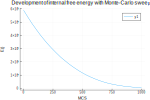

Checking if mcSweeped state is a state
Test Passed
Checking if mcSweeped state has lower energy
Test Passed
Testing if mcSweep! gives completely different state when temperature is infinite, where completely different
means that all values on all lattice sites are different. Thus we have proved that mcSweep! visits all lattice sites.
Test Passed
Checking that mcSweepEn! gives the same energy difference as taking E_new - E_old
-1.9451735141263906e7
-1.9451736058732033e7
Test Failed
  Expression: isapprox(δE, E(ψ) - E(ψ_old), atol=0, rtol=1.0e-13)


LoadError: [91mThere was an error during testing[39m

In [7]:


########################################################################################
#                     Testing Monte Carlo functions
#
#######################################################################################


# Create 20x20 random state.
ψ = State(2,20)
# Testing mcSweep!
println("\nTesting mcSweep!\n----------------------------------------------------------------")
ψ_old = copy(ψ)
println("Checking if copied state is correct")
println(checkState(ψ_old))

M = 1000
E_test = zeros(M)

# Do mcSweep! M times
for i = 1:M
    mcSweep!(ψ)
    E_test[i] = E(ψ)
end
println("Checking if mcSweeped state is a state")
println(checkState(ψ))
println("Checking if mcSweeped state has lower energy")
println(@test E(ψ) < E(ψ_old))
# Plot the development of E
plt = plot(1:M, E_test, title="Development of internal free energy with Monte-Carlo sweeps", xlabel="MCS", ylabel="E()")
display(plt)

# Then we find the proposal fraction for the update
mcProposalFraction(ψ)

# At infinite energy, metropolis Hasting will always accept the new state, therefore we expect
# that after a couple of mcSweeps, the state will be completely changed
println("Testing if mcSweep! gives completely different state when temperature is infinite, where completely different
means that all values on all lattice sites are different. Thus we have proved that mcSweep! visits all lattice sites.")
L = 4
ψ = State(2, SystConstants(L, 1, 1/(0.9)^2, 0.5, 0.9/L, 0))
ψ_old = copy(ψ)
for i = 1:2
    mcSweep!(ψ)
end
isCompletelyDifferent = true
for x=1:ψ.consts.L, y=1:ψ.consts.L
    isCompletelyDifferent = isCompletelyDifferent && (ψ_old.lattice[y,x].A[1] != ψ.lattice[y,x].A[1]
        && ψ_old.lattice[y,x].A[2] != ψ.lattice[y,x].A[2] && ψ_old.lattice[y,x].θ⁺ != ψ.lattice[y,x].θ⁺ 
        && ψ_old.lattice[y,x].θ⁻ != ψ.lattice[y,x].θ⁻ && ψ_old.lattice[y,x].u⁺ != ψ.lattice[y,x].u⁺)
end
println(@test isCompletelyDifferent==true)

println("Checking that mcSweepEn! gives the same energy difference as taking E_new - E_old")

H = -0.72   # External field
# Calculate periodic boundary conditioned f s.t. fL ∈ N
f = ceil(abs(H/(2π)*L))/L*sign(H)

# Create system
syst = SystConstants(22, 1.0, 1/0.3^2, 0.3, f, 1/0.12)
ψ = State(2, syst)
ψ_old = copy(ψ)
δE = 0.0
T = 1 # Number of MCS
for i = 1:T
    δE += mcSweepEn!(ψ)
end
println(δE)
println(E(ψ)- E(ψ_old))
println(@test isapprox(δE, E(ψ)- E(ψ_old), atol=0, rtol=1e-13))

println("\nTesting findEquilibrium\n----------------------------------------------------------------")
consts = SystConstants(18, 1.0, 1/(0.3)^2, 0.3, -3.0/18, 1/0.12)
ψ₁ = State(1, consts)
ψ₂ = State(2, consts)
println("Checking that a random state has lower energy than a completely correlated state")
println(@test E(ψ₁) < E(ψ₂))
(t₀, E₁, E₂, dE, ψ₁, ψ₂, sim₁, sim₂) = findEquilibrium(consts)
@show t₀
println("Checking that return arrays have same length")
println(@test size(E₁,1) == size(E₂,1) == size(dE, 1))
println("Plotting results")
N = size(dE, 1)
int = 1:N
plt = plot(int, dE[int], title="Difference in energy for a correlated state - random state", xlabel="MCS", ylabel="E1-E2")
display(plt)
plt = plot(int, E₁[int], title="Internal energy of correlated state", xlabel="MCS", ylabel="E1")
display(plt)
plt = plot(int, E₂[int], title="Internal energy of un-correlated state", xlabel="MCS", ylabel="E2")
display(plt)


In [ ]:


########################################################################################
#                     Testing local vorticity
#
#######################################################################################
println("\nTesting n⁺\n----------------------------------------------------------------")
# Creating state where there is no contribution from Gauge fields
ψ = State(1, SystConstants(2, 4.0, 0.0, 1.0, 0.0, 1/40))
ϕ = ψ.lattice[2,1]
ϕᵣ₊₁ = ψ.lattice[2,2]
ϕᵣ₊₂ = ψ.lattice[1,1]
ϕᵣ₊₁₊₂ = ψ.lattice[1,2]
println("Checking n⁺ for difference phase configurations.")
# Setting phases manually
ϕ.θ⁺ = π/4
ϕᵣ₊₁.θ⁺ = 3π/4
ϕᵣ₊₂.θ⁺ = 3π/4
ϕᵣ₊₁₊₂.θ⁺ = 5π/4
println(@test n⁺(ψ.consts, ϕ, ϕᵣ₊₁, ϕᵣ₊₂, ϕᵣ₊₁₊₂, 1) == 0)
ϕ.θ⁺ = π/4
ϕᵣ₊₁.θ⁺ = 3π/4
ϕᵣ₊₂.θ⁺ = 7π/4
ϕᵣ₊₁₊₂.θ⁺ = 5π/4
println(@test n⁺(ψ.consts, ϕ, ϕᵣ₊₁, ϕᵣ₊₂, ϕᵣ₊₁₊₂, 1) == -two_pi)
ϕ.θ⁺ = π/4
ϕᵣ₊₁.θ⁺ = -π/4
ϕᵣ₊₂.θ⁺ = -5π/4
ϕᵣ₊₁₊₂.θ⁺ = -3π/4
println(@test n⁺(ψ.consts, ϕ, ϕᵣ₊₁, ϕᵣ₊₂, ϕᵣ₊₁₊₂, 1) == two_pi)


########################################################################################
#                     Testing structure function sum
#
#######################################################################################
println("\nTesting structureFunctionPluss(k, ψ)\n----------------------------------------------------------------")
# First the zero test. If we set everything to 0 do we get 0 in the end?
println("Case: S(k) for θ⁺=θ⁻=A=0 with k random")
ψ = State(1,30)
L = size(ψ.lattice,1)
ψ.consts = SystConstants(30, 1.0, 1.0, 0.5, 0, 1/300)
k = [rand(1:L)-1, rand(1:L)-1]
println(@test structureFunctionPluss(k, ψ) == 0)

# Even if we create a local vortex at [L-1,2], the sum should be zero still if k=0
println("Case: S(0) for local vortex at position [L-2, 2] while A=0")
ψ.lattice[L-1, 3].θ⁺ = π/2
ψ.lattice[L-2, 3].θ⁺ = π
ψ.lattice[L-2, 2].θ⁺ = 3π/2
println("n⁺ = -2π at [L-2,2]")
println(@test n⁺(ψ.consts,ψ.lattice[L-1,2],ψ.lattice[L-1,3],ψ.lattice[L-2,2],ψ.lattice[L-2,3], 2) == -two_pi)
println("S(0) = 0")
println(@test structureFunctionPluss([0,0], ψ) == 0)

# For a general k, we will get the expression
# Note that the order of the terms in the sum is important for getting the same floating point value.
println("Case: S(k) for local vortex at position [L-2, 2] while A=0 for random k")
res = 0.0
res -= exp(im*(k⋅getVectorPosition(L,[L,3])))*two_pi
res += exp(im*(k⋅getVectorPosition(L,[L-2, 1])))*two_pi
res += exp(im*(k⋅getVectorPosition(L,[L-2, 2])))*two_pi
res -= exp(im*(k⋅getVectorPosition(L,[L-1,2])))*two_pi
res = abs2(res)
println(@test structureFunctionPluss(k, ψ) == res)

# Finally we want to turn on the static part of the gauge field and make sure that this normalizes correctly
# when k = 0, given that all phases are again zero.
println("Checking that function gives correct normalization unnormalizedS(0) = (fL²)²")
ψ = State(1,L)
ψ.consts = SystConstants(30, 1.0, 1.0, 0.5, 1/((rand()+1)*L), 1/300)
res = (ψ.consts.f*L^2*two_pi)^2
#println(res)
#println(structureFunctionPluss([0,0],ψ))
println(@test isapprox(structureFunctionPluss([0,0], ψ),res,atol=0,rtol=1e-15*L^2))